# Amazon Reviews Analysis 

## 1. Import libaries and data and visualise 

In [1]:
#import the libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
#load data and summarise 
df = pd.read_csv('Reviews.csv')
print(df.shape)     #check the dimensions 
df = df.head(500)   #only collect 500 
print(df.shape) 

(568454, 10)
(500, 10)


In [3]:
df.head(10)    #check the data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [4]:
df_nan = df[df.isna().any(axis=1)]   #check the Nan value
df_nan 

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text


Data is clean but make sure to clean with dropna function

In [5]:
df.dropna()  

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
495,496,B000G6RYNE,APGAA43E3WPN7,Darren,0,0,5,1201392000,amazing chips,i rarely eat chips but i saw these and tried t...
496,497,B000G6RYNE,ABR7HU5H1KNE,Keith,0,0,5,1196726400,Best Chip Ever,This is easily the best potato chip that I hav...
497,498,B000G6RYNE,AJQD2WWJYOYFQ,bubbles,0,0,4,1186617600,"Tangy, spicy, and sweet- oh my!",Kettle Chips Spicy Thai potato chips have the ...
498,499,B000G6RYNE,A16YH487W9ZYO0,Bruce G. Lindsay,0,0,4,1184198400,An indulgence with a bite,"Okay, I should not eat potato chips, nor shoul..."


In [6]:
df.sample(10)   #check the ramdom data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
215,216,B002TDK0VK,A24HJWXL3LHULM,scott Smith,0,1,5,1289865600,Looking for a different flavor?,I order these olives a lot. They are un-like a...
138,139,B002SRYRE8,A1FJJQA34W0F4K,"Gettin Real ""gettin real""",0,0,5,1329177600,Simply the BEST!,I keep trying other brands.... cheaper brands....
46,47,B001EO5QW8,AQLL2R1PPR46X,grumpyrainbow,0,0,5,1192752000,good,Good oatmeal. I like the apple cinnamon the b...
210,211,B0009XLVGA,A2U3Z5S70AE80V,Margaret,2,2,5,1267920000,My cat loves it!,I started my cat on Felidae Platinum about 3 w...
482,483,B000G6RYNE,A26ONAQEIUEMV4,"Dolores Swan ""Swannie""",0,0,5,1215129600,Very good chips at a great price.,These chips are quite tasty and the price is r...
450,451,B000G6RYNE,AKRLMISQPL8QW,B. Sanders,0,0,5,1289174400,Convenience at low cost,I subscribed to these - one case every three m...
237,238,B000WFRMRW,A3Q7QBDSAZ670I,B. Barnett,0,0,4,1331251200,High Quality... But it gave my dog wicked gas..,The recommendation when we bought our puppies ...
268,269,B000LKZK7C,A2JRK3K99168A1,djn,0,0,4,1336089600,It's sugar..,"It's just sugar in the raw, it's flavor profil..."
415,416,B005WU7V00,A3UV9TOZW3XXPV,tacoland,1,1,5,1336521600,VERY GOOD! Great taste and easy for a single guy!,I was surprised about how good this was my fam...
368,369,B002O3VHXU,A1OIMIM4FHT4IG,"Jerry Perkins ""Nevada Perky""",2,2,4,1283817600,Price surprise,"""Nantucket Blend coffee is one of my favorites..."


In [7]:
df.dtypes         #check the type of data

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

### Visualise the Score data

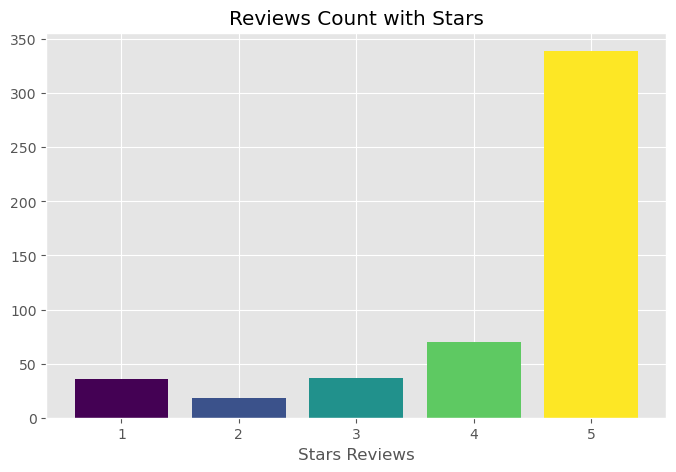

In [8]:
counts = df['Score'].value_counts().sort_index()
fig, ax =  plt.subplots(figsize=(8, 5))
colors = plt.cm.viridis(np.linspace(0, 1, len(counts)))
bars = ax.bar(counts.index, counts.values, color=colors)
ax.set_xlabel('Stars Reviews')
ax.set_title('Reviews Count with Stars')
plt.show()

## 2. Check the reviews by using Natural Language Toolkit 

### check the review 

In [9]:
example = df['Text'][50]
print(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


In [10]:
tokens = nltk.word_tokenize(example) #  make tokenization using nltk Library ( splitting text into individual units)
tokens[:10]

['This', 'oatmeal', 'is', 'not', 'good', '.', 'Its', 'mushy', ',', 'soft']

### Call the POS function (Part of Speech Tagging )
To understand the grammatical structure of the text

### Most common POS tags
    NN : Noun, singular (e.g: dog)

    NNS: Noun, plural (e.g: dogs)

    VB: Verb, base form (e.g: run)

    VBD: Verb, past tense (e.g: ran)

    JJ: Adjective (e.g: big)

    RB: Adverb (e.g: quickly)

    PRP: Personal pronoun (e.g: I, you)

    IN: Preposition/subordinating conjunction (e.g: in, on)

    DT: Determiner (e.g: the, a)

In [11]:
tag = nltk.pos_tag(tokens) #check with pos_tag
tag[:10]

[('This', 'DT'),
 ('oatmeal', 'NN'),
 ('is', 'VBZ'),
 ('not', 'RB'),
 ('good', 'JJ'),
 ('.', '.'),
 ('Its', 'PRP$'),
 ('mushy', 'NN'),
 (',', ','),
 ('soft', 'JJ')]

### call the function to recognizes named entities

In [12]:
entities = nltk.chunk.ne_chunk(tag)
entities.pprint()   #tree style printing 

(S
  This/DT
  oatmeal/NN
  is/VBZ
  not/RB
  good/JJ
  ./.
  Its/PRP$
  mushy/NN
  ,/,
  soft/JJ
  ,/,
  I/PRP
  do/VBP
  n't/RB
  like/VB
  it/PRP
  ./.
  (ORGANIZATION Quaker/NNP Oats/NNPS)
  is/VBZ
  the/DT
  way/NN
  to/TO
  go/VB
  ./.)


## sentimental analysis 

In [13]:
# Download VADER data
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/thirijewel/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

The vader_lexicon file includes pre-trained sentiment scores for a large number of words and phrases.It is essential for sentimental analysis. The lexicon  will  help in analyzing the sentiment of text efficiently and accurately, especially in informal or social media contexts.

In [14]:
#import SentimentIntensityAnalyzer class from the nltk.sentiment module
from nltk.sentiment import SentimentIntensityAnalyzer
#imports the tqdm function from the tqdm.notebook module
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

SentimentIntensityAnalyzer class is a part of the NLTK library and is used for sentiment analysis.
It analyzes the sentiment of a given text and returns a score indicating the sentiment's intensity.

tqdm library for displaying progress bars in loops or iterables, which is useful for tracking the progress of long-running operations.

In [16]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [18]:
!pip install torch

  Using cached torch-2.4.0-cp312-none-macosx_11_0_arm64.whl.metadata (26 kB)
Using cached torch-2.4.0-cp312-none-macosx_11_0_arm64.whl (62.1 MB)


In [18]:
import torch
print(torch.__version__)


2.4.0


In [26]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [27]:
sia.polarity_scores('Snowing today. It is miracle!')#check the positive score

{'neg': 0.0, 'neu': 0.494, 'pos': 0.506, 'compound': 0.6239}

The compound score is 0.6239,more neutral. -1 (most negative) to +1 (most positive).

In [28]:
sia.polarity_scores('Service is really bad, I am sure I will not come back!')#check the negative score

{'neg': 0.279, 'neu': 0.546, 'pos': 0.175, 'compound': -0.3656}

more negative result

In [29]:
sia.polarity_scores(example) #run the example

{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [34]:
from tqdm import tqdm
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [35]:
#Running the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Text']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

100%|███████████████████████████████████████| 500/500 [00:00<00:00, 2768.83it/s]


tqdm to display a progress bar, making it easier to monitor the progress of processing large datasets.

In [36]:
 #Converts  res into a Pandas DataFrame and transposes
vaders = pd.DataFrame(res).T 
#Resets the index of the transposed DataFrame and renames the index column to 'Id'.
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
#Merges the vaders DataFrame with the original df DataFrame
vaders = vaders.merge(df, how='left')

In [37]:
vaders.head(10) #first 10 rows

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,0.029,0.809,0.163,0.8830,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,0.034,0.693,0.273,0.9346,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,0.000,0.520,0.480,0.9487,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,0.000,0.851,0.149,0.6369,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,0.000,0.705,0.295,0.8313,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [38]:
vaders.sample(10) #random

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
70,71,0.036,0.916,0.048,0.2228,B001GVISJC,A27TKQHFW0FB5N,Chet,2,2,5,1254355200,Great Gummi!,These Albanese gummi bears and rings and so on...
488,489,0.000,0.861,0.139,0.9598,B000G6RYNE,A1B05INWIDZ74O,M. A. Ramos,0,0,3,1213142400,Prefer other flavors,I took one and said good Russet potato chip bu...
147,148,0.058,0.867,0.075,0.1533,B0017I8UME,ATBE88PKKQTRA,Matthew R Lehmkuhler,0,0,5,1344384000,Love the salsa!!,This is one of the best salsas that I have fou...
231,232,0.000,0.904,0.096,0.8144,B003SO503C,A3OXRFCJI67IMN,Bold Consumer,0,0,5,1333843200,Really Nice Taste!,I'm trying several of the Wu Yi teas. I like t...
228,229,0.000,0.837,0.163,0.6486,B007JFV6RK,A2UC5JUVHIF80L,Abendago,1,1,5,1334016000,Mcclures bloody Mary mix,Took me one or two to get used to the pickle t...
243,244,0.000,1.000,0.000,0.0000,B001EO5ZMY,A7WE8ZWEJG34E,Kapitoshka,2,3,4,1272499200,This is what you get in the store,I have tried it out despite the other review a...
302,303,0.014,0.705,0.281,0.9763,B001UJEN6C,A28VTF9FQ42SBV,jeremygiesel,0,0,5,1344729600,Good Stuff,"Products takes pretty good, and it doesn't lea..."
140,141,0.098,0.787,0.114,0.2023,B001GVISJW,ARS5Q7LR6HWPG,"N. Pine ""pcone""",0,0,4,1314489600,Nice snack,I bought this for our office to give people so...
133,134,0.020,0.878,0.103,0.8082,B003OB0IB8,AOTEC8KEH8JGN,Seth S Moyers,0,0,5,1334880000,Great value and convenient ramen,Got these on sale for roughly 25 cents per cup...
475,476,0.066,0.614,0.320,0.9684,B000G6RYNE,A1DOBB5XZ1KMZ5,"A. M. L. Hentz ""AnneMarie""",0,0,5,1217030400,Fabulous!,These chips are some of the best I've tasted. ...


/var/folders/7z/6r30qj5x0ks8s7xy930_twqc0000gn/T/ipykernel_6686/293544788.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axis = sns.barplot(data=vaders, x='Score', y='compound', palette=custom_colors)


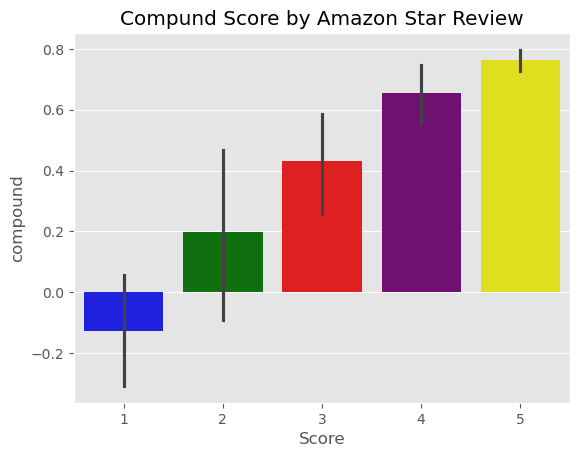

In [44]:
#Plot Vader results
custom_colors = ['blue', 'green', 'red', 'purple','yellow']
axis = sns.barplot(data=vaders, x='Score', y='compound', palette=custom_colors)
axis.set_title('Compund Score by Amazon Star Review')
plt.show()

The vertical lines on the bar plot represent the errors bars, it shows the variability or uncertainty in the data.

/var/folders/7z/6r30qj5x0ks8s7xy930_twqc0000gn/T/ipykernel_6686/577394789.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vaders, x="Score", y="pos", ax=axs[0],palette=custom_colors)
/var/folders/7z/6r30qj5x0ks8s7xy930_twqc0000gn/T/ipykernel_6686/577394789.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vaders, x="Score", y="neu", ax=axs[1],palette=custom_colors)
/var/folders/7z/6r30qj5x0ks8s7xy930_twqc0000gn/T/ipykernel_6686/577394789.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vaders, x="Score", y="neg", ax=a

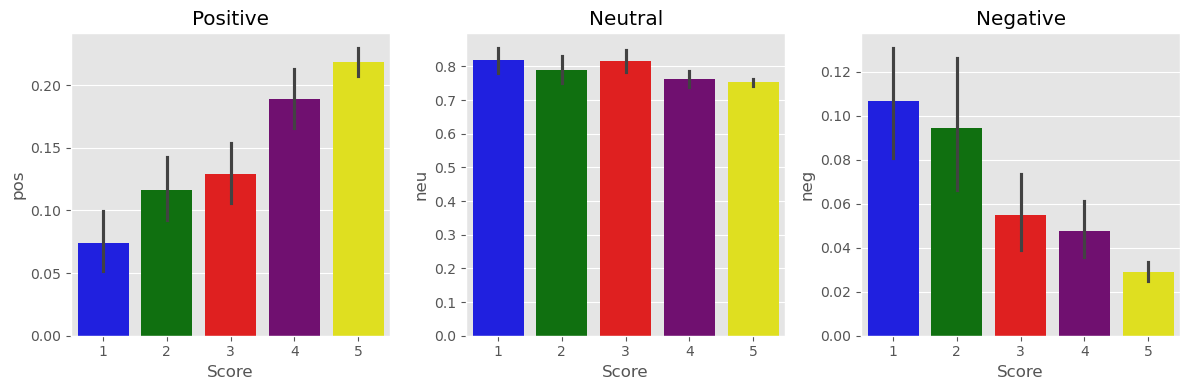

In [45]:
#Plot all 
fig,axs = plt.subplots(1, 3, figsize=(12, 4))
sns.barplot(data=vaders, x="Score", y="pos", ax=axs[0],palette=custom_colors)
sns.barplot(data=vaders, x="Score", y="neu", ax=axs[1],palette=custom_colors)
sns.barplot(data=vaders, x="Score", y="neg", ax=axs[2],palette=custom_colors)
axs[0].set_title("Positive")
axs[1].set_title("Neutral")
axs[2].set_title("Negative")
plt.tight_layout()
plt.show()


In [46]:
# Imports the AutoTokenizer class from the Hugging Face transformers library.
from transformers import AutoTokenizer
# Imports the AutoModelForSequenceClassification class from the Hugging Face transformers library
from transformers import AutoModelForSequenceClassification
# Imports the softmax function from the scipy.special module to convert a vector of values into a probability distribution
from scipy.special import softmax

In [47]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [49]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment" # Defines the identifier of the pre-trained model.
tokenizer = AutoTokenizer.from_pretrained(MODEL) #Initializes a tokenizer associated with the specified model
model = AutoModelForSequenceClassification.from_pretrained(MODEL) #Loads a pre-trained model for sequence classification.

Note: cardiffnlp/twitter-roberta-base-sentiment  is the model identifier on the Hugging Face Model Hub. It specifies a particular pre-trained model designed for sentiment analysis on Twitter data using RoBERTa architecture

In [50]:
print(example)
sia.polarity_scores(example)

This oatmeal is not good. Its mushy, soft, I don't like it. Quaker Oats is the way to go.


{'neg': 0.22, 'neu': 0.78, 'pos': 0.0, 'compound': -0.5448}

In [56]:
tokenizer(example, return_tensors= "pt") # input data for transformers models


{'input_ids': tensor([[    0,   713,  1021, 38615,    16,    45,   205,     4,  3139, 39589,
           219,     6,  3793,     6,    38,   218,    75,   101,    24,     4,
          3232,  4218,   384,  2923,    16,     5,   169,     7,   213,     4,
             2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1]])}

In [57]:
encoded_text = tokenizer(example, return_tensors= "pt")
output= model(**encoded_text) #Unpacks the dictionary of tensors and passes them as keyword arguments to the model.


In [58]:
scores=output[0][0].detach().numpy()
scores=softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.97635514, 'roberta_neu': 0.020687485, 'roberta_pos': 0.0029573753}


In [60]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [61]:
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)): #Iterates through each row of the DataFrame 
    try:
        text = row['Text'] #Extracts the text for sentiment analysis from the DataFrame.
        myid = row['Id']   #Extracts the unique identifier for the row
        vader_result = sia.polarity_scores(text) #compute sentiment scores for the text.
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text) #function to compute sentiment scores using RoBERTa.
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

 17%|███████▎                                  | 87/500 [00:05<00:19, 21.37it/s]

Broke for id 83


 38%|███████████████▍                         | 189/500 [00:10<00:14, 21.54it/s]

Broke for id 187


100%|█████████████████████████████████████████| 500/500 [00:27<00:00, 18.37it/s]


analyze the sentiment of text data from a DataFrame using two different sentiment analysis tools: VADER (Valence Aware Dictionary and sEntiment Reasoner) and RoBERTa (a transformer-based model).
- Merges the sentiment scores from both VADER and RoBERTa into a single dictionary.
- The try-except block ensures that if there are any issues processing a specific row, the function will
  continue running and handle errors gracefully, allowing you to still process the majority of data.

In [62]:
results_df = pd.DataFrame(res).T
results_df = results_df.reset_index().rename(columns={'index': 'Id'})
results_df = results_df.merge(df, how='left')

In [63]:
results_df.columns

Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'ProductId', 'UserId',
       'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator',
       'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [64]:
results_df.head(10)

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.009624,0.049980,0.940395,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.508986,0.452414,0.038600,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.003229,0.098068,0.898704,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002295,0.090219,0.907486,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.001635,0.010302,0.988063,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,0.029,0.809,0.163,0.8830,0.006130,0.021796,0.972075,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,0.034,0.693,0.273,0.9346,0.001305,0.007774,0.990921,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,0.000,0.520,0.480,0.9487,0.002029,0.005685,0.992285,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,0.000,0.851,0.149,0.6369,0.003874,0.094156,0.901970,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,0.000,0.705,0.295,0.8313,0.003103,0.055912,0.940984,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


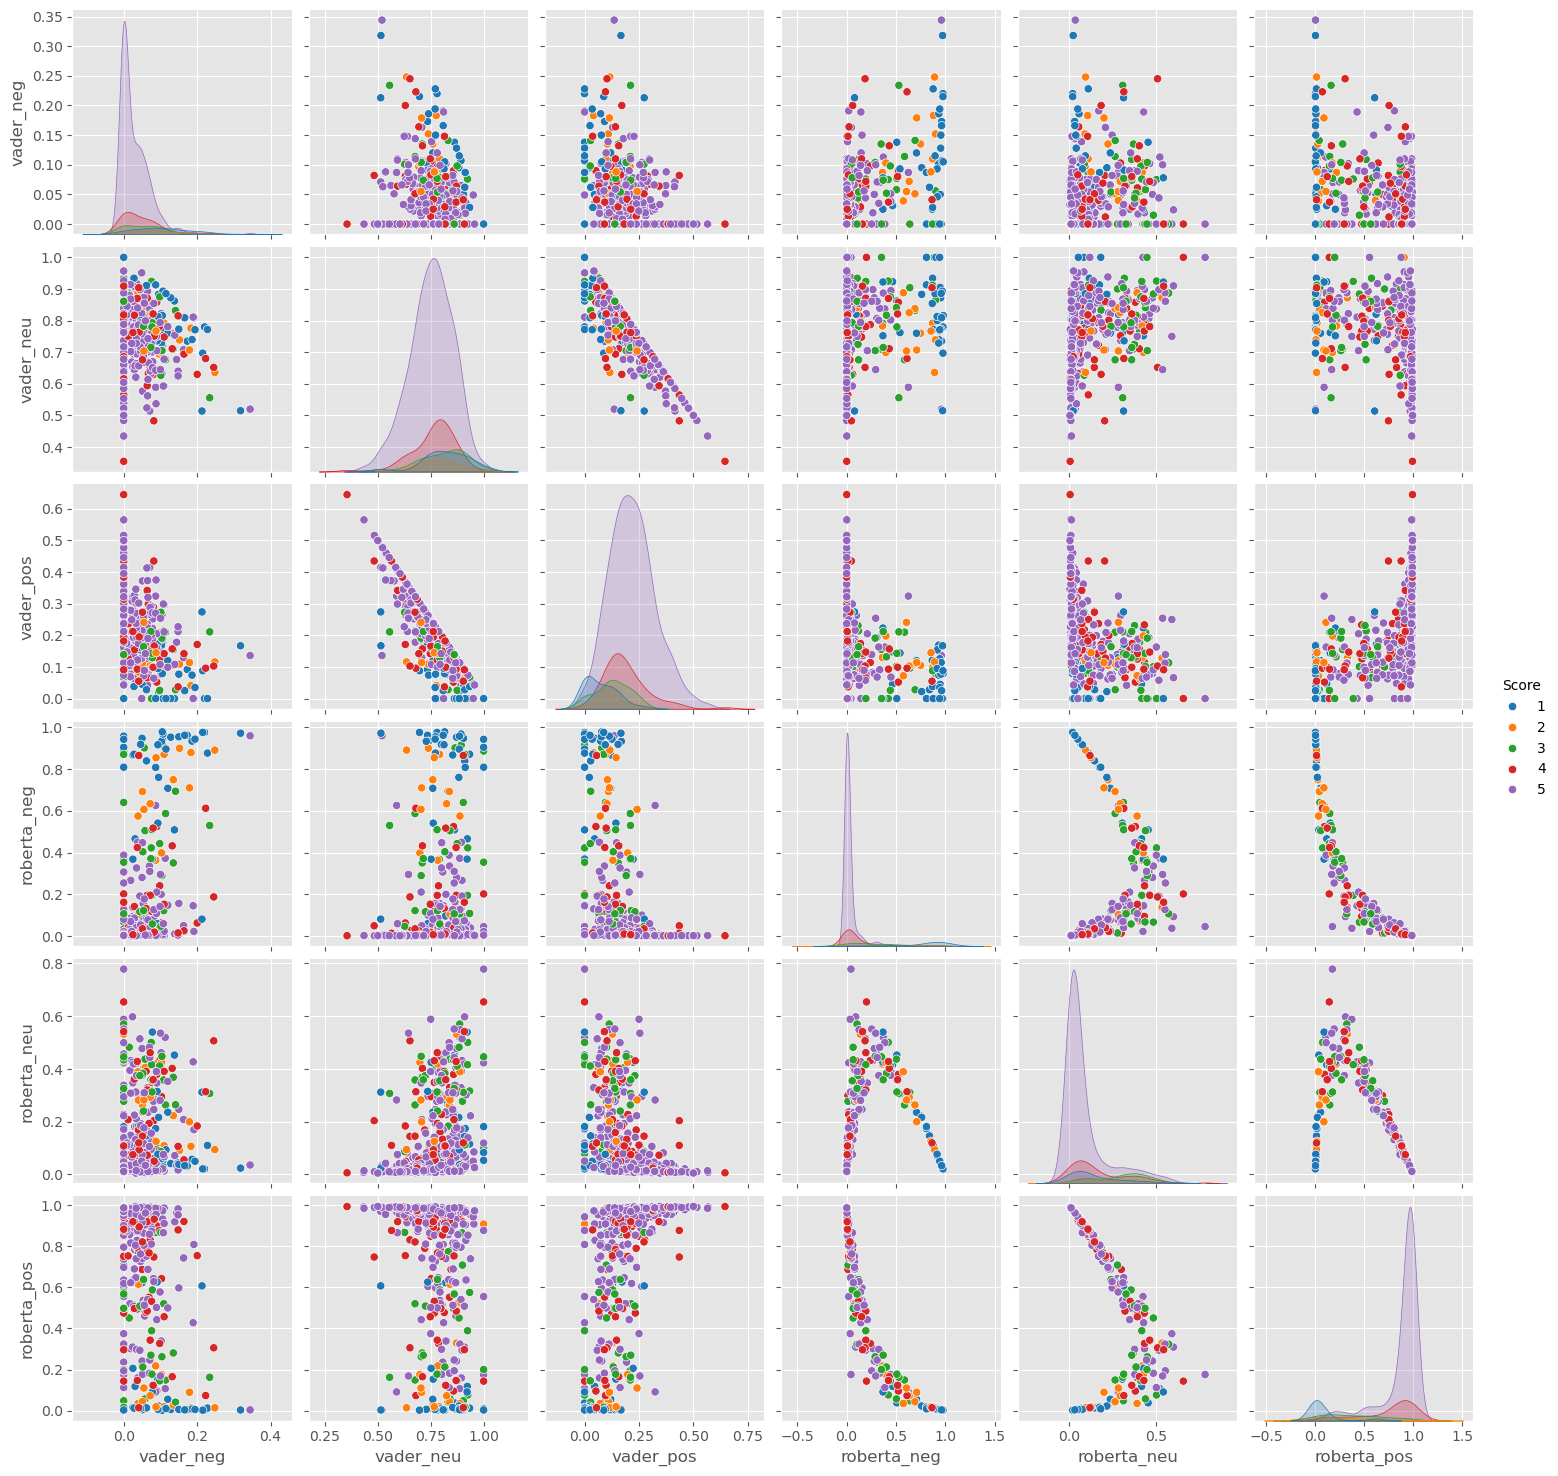

In [65]:
sns.pairplot(data=results_df,
             vars = ["vader_neg", "vader_neu", "vader_pos", 
                     "roberta_neg", "roberta_neu", "roberta_pos"],
             hue="Score",palette="tab10")
plt.show()

In [66]:
#Postive sentiment 1 star review in Roberta
results_df.query("Score ==1").sort_values("roberta_pos", ascending=False)["Text"].values[0]

'I felt energized within five minutes, but it lasted for about 45 minutes. I paid $3.99 for this drink. I could have just drunk a cup of coffee and saved my money.'

In [67]:
#Postive sentiment 1 star review in Vader
results_df.query("Score ==1").sort_values("vader_pos", ascending=False)["Text"].values[0]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

In [68]:
#negative sentiment 5 stars review in Roberta
results_df.query("Score ==5")\
.sort_values("roberta_neg", ascending=False)["Text"].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [69]:
#negative sentiment 5 stars review in Vader
results_df.query("Score ==5")\
.sort_values("vader_neg", ascending=False)["Text"].values[0]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

In [70]:
#highest neutral sentiment score according to Roberta:
neutral_3_star_review = results_df.query("Score == 3")\
.sort_values("roberta_neu", ascending=False)["Text"].values[0]
neutral_3_star_review

'I purchased it because it was on sale. In terms of the energy it provides, it works, but the taste leaves something to be desired. I tried mixing it with some water to make it more drinkable.'

## Finding the percentage of reviews

In [73]:
score_counts = results_df['Score'].value_counts()
score_percentages = score_counts / score_counts.sum() * 100

print(score_counts)
print(score_percentages)


Score
5    337
4     70
3     37
1     36
2     18
Name: count, dtype: int64
Score
5    67.670683
4    14.056225
3     7.429719
1     7.228916
2     3.614458
Name: count, dtype: float64


In [76]:
# Calculate the percentage of each roberta sentiment
results_df['roberta_sentiment'] = results_df[['roberta_neg', 'roberta_neu', 'roberta_pos']].idxmax(axis=1)

sentiment_counts = results_df['roberta_sentiment'].value_counts()
sentiment_percentages = sentiment_counts / sentiment_counts.sum() * 100

print(sentiment_counts)
print("")
print(sentiment_percentages)



roberta_sentiment
roberta_pos    399
roberta_neg     64
roberta_neu     35
Name: count, dtype: int64

roberta_sentiment
roberta_pos    80.120482
roberta_neg    12.851406
roberta_neu     7.028112
Name: count, dtype: float64


In [77]:
# Calculate the percentage of each  vader sentiment
results_df['vader_sentiment'] = results_df[['vader_neg', 'vader_neu', 'vader_pos']].idxmax(axis=1)

vader_sentiment_counts = results_df['vader_sentiment'].value_counts()
vader_sentiment_percentages = vader_sentiment_counts / vader_sentiment_counts.sum() * 100

# Print the counts and percentages
print(vader_sentiment_counts)
print("")
print(vader_sentiment_percentages)


vader_sentiment
vader_neu    494
vader_pos      4
Name: count, dtype: int64

vader_sentiment
vader_neu    99.196787
vader_pos     0.803213
Name: count, dtype: float64


In [78]:
#check the correlation between Vader and Roberta Scores
correlations = results_df[['vader_neg', 'vader_neu', 'vader_pos', 'roberta_neg', 'roberta_neu', 'roberta_pos']].corr()
print(correlations)


             vader_neg  vader_neu  vader_pos  roberta_neg  roberta_neu  \
vader_neg     1.000000  -0.170217  -0.324083     0.519809     0.201808   
vader_neu    -0.170217   1.000000  -0.877052     0.217008     0.371664   
vader_pos    -0.324083  -0.877052   1.000000    -0.461669    -0.455331   
roberta_neg   0.519809   0.217008  -0.461669     1.000000     0.264037   
roberta_neu   0.201808   0.371664  -0.455331     0.264037     1.000000   
roberta_pos  -0.496940  -0.337455   0.566232    -0.899830    -0.658347   

             roberta_pos  
vader_neg      -0.496940  
vader_neu      -0.337455  
vader_pos       0.566232  
roberta_neg    -0.899830  
roberta_neu    -0.658347  
roberta_pos     1.000000  


## Visualise with heat map 

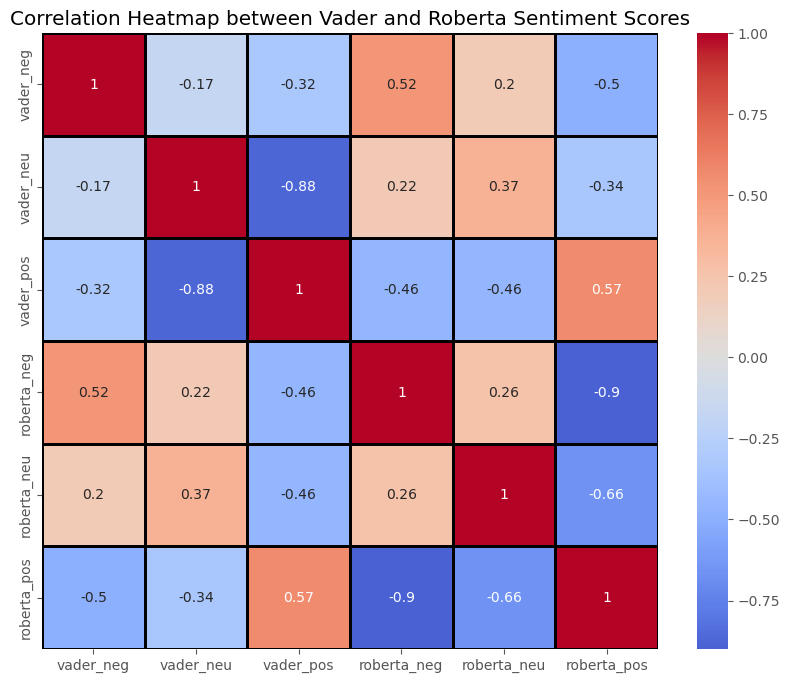

In [80]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, cmap='coolwarm',
            center=0, linewidths=1, linecolor='black', square=True)
plt.title("Correlation Heatmap between Vader and Roberta Sentiment Scores")
plt.show()

## Summary 
Based on the analysis, the analysis reveals a strong positive sentiment among the reviews, with most users rating the products highly. Roberta's analysis corroborates this by detecting a high percentage of positive sentiment. However, the Vader model's results suggest a more neutral tone overall, possibly due to differences in how the models interpret sentiment.

The contrasting results between Roberta and Vader indicate that the choice of sentiment analysis model can significantly impact the interpretation of the data. Roberta appears more sensitive to both positive and negative sentiments, while Vader shows a bias towards neutral classification in this case.

